In [289]:
%matplotlib inline

# import dependencies
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt

In [290]:
#set the url as a variable
url = 'https://www.the-numbers.com/weekly-box-office-chart'

In [291]:
#make a call to the internet page
response = requests.get(url)

#parse the text version of the response using an html parser 
soup = bs(response.text, 'html.parser')

#pretty print the parsed text
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
  </script>
  <meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
  <!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="telephone=no" name="format-detection"/>
  <!-- for apple mobile -->
  <meta content="521546213" property="fb:admins">
   <meta content="initial-scale=1" name="viewport"/>
   <meta content="Weekly (

In [292]:
#finds the table in the HTML page
all_table_data = soup.find_all('table')

#finds and isolates only the <tr> tags and subtags within the above table
rows = soup.find_all('tr')

#start an empty master list of rows
data = []

#loop through each row
for row in rows:
    #each cell is a column within that row, so you use <td> to find each cell
    cols = row.find_all('td')
    #add the cells to a preliminary list using list comprehensions (this is is for a single row)
    cols = [element.text.strip() for element in cols]
    #add that preliminary list to the master list of rows
    data.append([element for element in cols])

In [293]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,← Previous Chart,Chart Index,,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None
2,1,(1),Aquaman,Warner Bros.,"$41,575,901",-55%,"4,184","$9,937","$270,596,781",3
3,2,new,Escape Room,Sony Pictures,"$23,532,931",,"2,717","$8,661","$23,532,931",1
4,3,(2),Mary Poppins Returns,Walt Disney,"$20,485,680",-61%,"4,090","$5,009","$143,441,985",4


In [294]:
# drop first two rows
df.drop([0,1], inplace=True)

In [295]:
df.columns = ["Rank", "Last Rank", "Movie", "Distributor", "Gross", "Change", "Theatres", "Per Theatre", "Total Gross", "Week"]

In [296]:
df.head()

,Rank,Last Rank,Movie,Distributor,Gross,Change,Theatres,Per Theatre,Total Gross,Week
2,1,(1),Aquaman,Warner Bros.,"$41,575,901",-55%,"4,184","$9,937","$270,596,781",3
3,2,new,Escape Room,Sony Pictures,"$23,532,931",,"2,717","$8,661","$23,532,931",1
4,3,(2),Mary Poppins Returns,Walt Disney,"$20,485,680",-61%,"4,090","$5,009","$143,441,985",4
5,4,(4),Spider-Man: Into The Spider…,Sony Pictures,"$17,924,099",-50%,"3,419","$5,242","$138,775,445",4
6,5,(3),Bumblebee,Paramount Pictures,"$17,341,837",-54%,"3,597","$4,821","$101,694,977",3


In [297]:
# Make a copy of dataframe
new_df = df.copy()

# remove all dollar signs
new_df['Gross'] = [x.strip('$') for x in df['Gross']]
new_df['Per Theatre'] = [x.strip('$') for x in df['Per Theatre']]
new_df['Total Gross'] = [x.strip('$') for x in df['Total Gross']]

new_df.head()

,Rank,Last Rank,Movie,Distributor,Gross,Change,Theatres,Per Theatre,Total Gross,Week
2,1,(1),Aquaman,Warner Bros.,"41,575,901",-55%,"4,184","9,937","270,596,781",3
3,2,new,Escape Room,Sony Pictures,"23,532,931",,"2,717","8,661","23,532,931",1
4,3,(2),Mary Poppins Returns,Walt Disney,"20,485,680",-61%,"4,090","5,009","143,441,985",4
5,4,(4),Spider-Man: Into The Spider…,Sony Pictures,"17,924,099",-50%,"3,419","5,242","138,775,445",4
6,5,(3),Bumblebee,Paramount Pictures,"17,341,837",-54%,"3,597","4,821","101,694,977",3


In [298]:
# remove all commas and create new clean dataframe
new_df['Gross'] = new_df['Gross'].str.replace(',', '')
new_df['Theatres'] = new_df['Theatres'].str.replace(',', '')
new_df['Total Gross'] = new_df['Total Gross'].str.replace(',', '')
new_df.head()

,Rank,Last Rank,Movie,Distributor,Gross,Change,Theatres,Per Theatre,Total Gross,Week
2,1,(1),Aquaman,Warner Bros.,41575901,-55%,4184,"9,937",270596781,3
3,2,new,Escape Room,Sony Pictures,23532931,,2717,"8,661",23532931,1
4,3,(2),Mary Poppins Returns,Walt Disney,20485680,-61%,4090,"5,009",143441985,4
5,4,(4),Spider-Man: Into The Spider…,Sony Pictures,17924099,-50%,3419,"5,242",138775445,4
6,5,(3),Bumblebee,Paramount Pictures,17341837,-54%,3597,"4,821",101694977,3


In [299]:
# create new dataframe isolating movie, distributor, total gross revenue
movie_gross_df = new_df[["Movie", "Distributor", "Total Gross"]]
movie_gross_df.head()

,Movie,Distributor,Total Gross
2,Aquaman,Warner Bros.,270596781
3,Escape Room,Sony Pictures,23532931
4,Mary Poppins Returns,Walt Disney,143441985
5,Spider-Man: Into The Spider…,Sony Pictures,138775445
6,Bumblebee,Paramount Pictures,101694977


In [300]:
dist_gross_count = movie_gross_df.groupby("Distributor").count()["Total Gross"]
dist_gross_count.head()

Distributor
20th Century Fox      4
Amazon Studios        2
Annapurna Pictures    3
Aviron Pictures       1
CBS Films             1
Name: Total Gross, dtype: int64

In [301]:
dist_gross_sum = movie_gross_df.groupby("Distributor").sum()["Total Gross"]
dist_gross_sum.head()

Distributor
20th Century Fox      1952963064216214032457451729705000
Amazon Studios                             3134247616601
Annapurna Pictures                 326578435299425274518
Aviron Pictures                                  1624578
CBS Films                                        2024725
Name: Total Gross, dtype: object

In [302]:
# calculate averages to obtain average revenue per movie for each distributor

In [303]:
# combine the data into a single dataset using pandas merge
merged_df = pd.DataFrame(
    data={"Total Gross All Movies": dist_gross_sum,
          "# of Movies": dist_gross_count,
    }
)
merged_df.head()

,Total Gross All Movies,# of Movies
Distributor,,
20th Century Fox,1952963064216214032457451729705000,4
Amazon Studios,3134247616601,2
Annapurna Pictures,326578435299425274518,3
Aviron Pictures,1624578,1
CBS Films,2024725,1


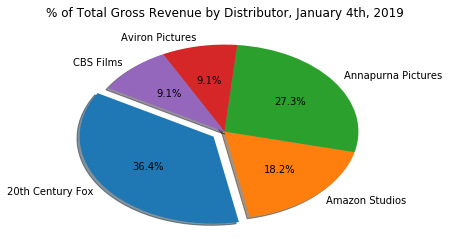

In [304]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = '20th Century Fox', 'Amazon Studios', 'Annapurna Pictures', 'Aviron Pictures', 'CBS Films'
sizes = [4, 2, 3, 1, 1]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. '20th Century Fox')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        explode=explode, shadow=True, startangle=150)

plt.title("% of Total Gross Revenue by Distributor, January 4th, 2019")

# Save Figure
plt.savefig('fig1.png')

plt.show()

In [305]:
twentieth_c_fox = new_df[new_df["Distributor"] == "20th Century Fox"]
twentieth_c_fox

,Rank,Last Rank,Movie,Distributor,Gross,Change,Theatres,Per Theatre,Total Gross,Week
12,11,(13),Bohemian Rhapsody,20th Century Fox,4019481,-9%,1080,"3,722",195296306,10
29,28,(26),Widows,20th Century Fox,171975,-34%,125,"1,376",42162140,8
43,42,(37),Once Upon a Deadpool,20th Century Fox,38714,-42%,73,530,324574517,34
47,46,(42),The Hate U Give,20th Century Fox,21609,-46%,31,697,29705000,14


In [306]:
twentieth_c_fox["Movie"]

12       Bohemian Rhapsody
29                  Widows
43    Once Upon a Deadpool
47         The Hate U Give
Name: Movie, dtype: object

In [307]:
twentieth_c_fox["Total Gross"]

12    195296306
29     42162140
43    324574517
47     29705000
Name: Total Gross, dtype: object

In [308]:
# isolated dataset for twentieth century fox releases
movies = ["Bohemian Rhapsody", "Widows", "Once Upon a Deadpool", "The Hate U Give"]
total_gross = [195296306, 42162140, 324574517, 29705000] 

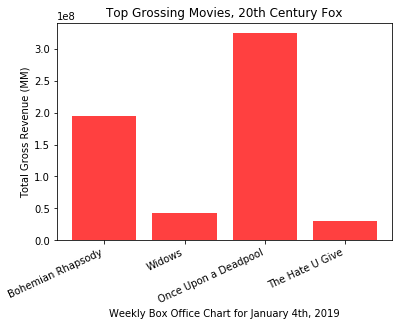

In [310]:
x_axis = np.arange(0, len(movies))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Top Grossing Movies, 20th Century Fox")
plt.xlabel("Weekly Box Office Chart for January 4th, 2019")
plt.ylabel("Total Gross Revenue (MM)")

plt.bar(x_axis, total_gross, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, movies,  ha='right', rotation=25)

# Save Figure
plt.savefig('fig2.png')

plt.show()

In [311]:
# establish mongodb location
conn = "mongodb://localhost:27017"

# collect to mongodb database
client = pymongo.MongoClient(conn)

In [312]:
# establish database name
db = client.moviesdb

In [313]:
# establish collection
movies = db.movies

In [314]:
# call the 'to_dict' function on the new_df dataframe 
# pass the argument'records' to translate each row of the df into a dictionary
data = new_df.to_dict("records")

In [315]:
data

[{'Rank': '1',
  'Last Rank': '(1)',
  'Movie': 'Aquaman',
  'Distributor': 'Warner Bros.',
  'Gross': '41575901',
  'Change': '-55%',
  'Theatres': '4184',
  'Per Theatre': '9,937',
  'Total Gross': '270596781',
  'Week': '3'},
 {'Rank': '2',
  'Last Rank': 'new',
  'Movie': 'Escape Room',
  'Distributor': 'Sony Pictures',
  'Gross': '23532931',
  'Change': '',
  'Theatres': '2717',
  'Per Theatre': '8,661',
  'Total Gross': '23532931',
  'Week': '1'},
 {'Rank': '3',
  'Last Rank': '(2)',
  'Movie': 'Mary Poppins Returns',
  'Distributor': 'Walt Disney',
  'Gross': '20485680',
  'Change': '-61%',
  'Theatres': '4090',
  'Per Theatre': '5,009',
  'Total Gross': '143441985',
  'Week': '4'},
 {'Rank': '4',
  'Last Rank': '(4)',
  'Movie': 'Spider-Man: Into The Spider…',
  'Distributor': 'Sony Pictures',
  'Gross': '17924099',
  'Change': '-50%',
  'Theatres': '3419',
  'Per Theatre': '5,242',
  'Total Gross': '138775445',
  'Week': '4'},
 {'Rank': '5',
  'Last Rank': '(3)',
  'Movie': 'B

In [316]:
# insert list into mongodb
movies.insert_many(data)

In [317]:
# try to find data in database
movies.find()